In [5]:
import pandas as pd

df = pd.read_csv('/content/Reviews.csv')
df

,Text,label
0,This is the best apps acording to a bunch of ...,1
1,This is a pretty good version of the game for ...,1
2,this is a really . there are a bunch of levels...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19991,this app is fricken stupid.it froze on the kin...,0
19992,Please add me!!!!! I need neighbors! Ginger101...,1
19993,love it! this game. is awesome. wish it had m...,1
19994,I love love love this app on my side of fashio...,1


In [6]:
# Mengetahui jumlah dataset menggunakan shape
jumlah_baris, jumlah_kolom = df.shape
print(f"Jumlah dataset: {jumlah_baris} baris, {jumlah_kolom} kolom")


Jumlah dataset: 19996 baris, 2 kolom


In [7]:
# Menghitung jumlah baris duplikat
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")


Jumlah baris duplikat: 0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19996 entries, 0 to 19995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    19996 non-null  object
 1   label   19996 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


In [9]:
text = df[['Text']]
text

,Text
0,This is the best apps acording to a bunch of ...
1,This is a pretty good version of the game for ...
2,this is a really . there are a bunch of levels...
3,"This is a silly game and can be frustrating, b..."
4,This is a terrific game on any pad. Hrs of fun...
...,...
19991,this app is fricken stupid.it froze on the kin...
19992,Please add me!!!!! I need neighbors! Ginger101...
19993,love it! this game. is awesome. wish it had m...
19994,I love love love this app on my side of fashio...


In [10]:
# Menentukan kategori risiko berdasarkan rating saja
def determine_risk(rating): # Changed 'row' to 'rating'
    if rating <= 0:
        return 'High Risk'
    elif rating >= 0:
        return 'Low Risk'

df['category_risk'] = df['label'].apply(determine_risk)
df

,Text,label,category_risk
0,This is the best apps acording to a bunch of ...,1,Low Risk
1,This is a pretty good version of the game for ...,1,Low Risk
2,this is a really . there are a bunch of levels...,1,Low Risk
3,"This is a silly game and can be frustrating, b...",1,Low Risk
4,This is a terrific game on any pad. Hrs of fun...,1,Low Risk
...,...,...,...
19991,this app is fricken stupid.it froze on the kin...,0,High Risk
19992,Please add me!!!!! I need neighbors! Ginger101...,1,Low Risk
19993,love it! this game. is awesome. wish it had m...,1,Low Risk
19994,I love love love this app on my side of fashio...,1,Low Risk


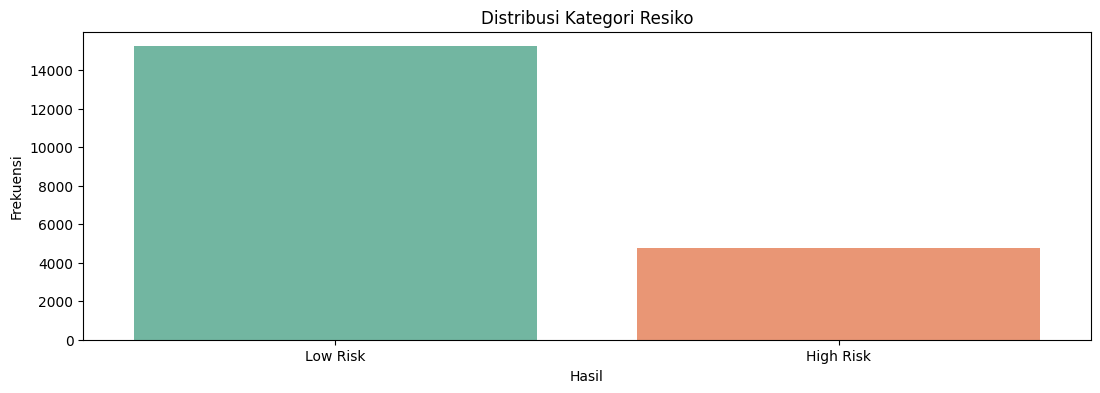

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi label y dengan hue dan palette
plt.figure(figsize=(13,4))
# Check if 'category_risk' column exists in DataFrame
if 'category_risk' in df.columns:
  # If exists, proceed with countplot
  sns.countplot(x='category_risk', data=df, hue='category_risk', palette='Set2', legend=False)
else:
  # If not exists, print an error message or handle accordingly
  print("Error: 'category_risk' column not found in DataFrame.")
plt.title('Distribusi Kategori Resiko')
plt.xlabel('Hasil')
plt.ylabel('Frekuensi')
plt.show()

In [12]:
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
from nltk.corpus import stopwords

# Assuming 'df' is your DataFrame and 'Normalized Tweet' is the column containing your text
# Create a list of Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Function to remove stopwords from a text
def remove_stopwords(text):
  # Check if the text is a string before processing
  if isinstance(text, str):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in indonesian_stopwords]
    return ' '.join(filtered_words)
  else:
    # Handle non-string values (e.g., NaN) by returning an empty string or original value
    return ''  # or return text

# Apply the function to your DataFrame
df.loc[:, 'Text'] = df['Text'].apply(remove_stopwords)
df

,Text,label,category_risk
0,This is the best apps acording to a bunch of p...,1,Low Risk
1,This is a pretty good version of the game for ...,1,Low Risk
2,this is a really . there are a bunch of levels...,1,Low Risk
3,"This is a silly game and can be frustrating , ...",1,Low Risk
4,This is a terrific game on any pad . Hrs of fu...,1,Low Risk
...,...,...,...
19991,this app is fricken stupid.it froze on the kin...,0,High Risk
19992,Please add me ! ! ! ! ! I need neighbors ! Gin...,1,Low Risk
19993,love it ! this game . is awesome . wish it had...,1,Low Risk
19994,I love love love this app on my side of fashio...,1,Low Risk


In [14]:
def tokenize(text):
  tokens = text.split()
  return tokens

# Change 'reviews.Text' to 'reviews.text'
df['tokenize'] = df['Text'].apply(tokenize)
df['tokenize']

,tokenize
0,"[This, is, the, best, apps, acording, to, a, b..."
1,"[This, is, a, pretty, good, version, of, the, ..."
2,"[this, is, a, really, ., there, are, a, bunch,..."
3,"[This, is, a, silly, game, and, can, be, frust..."
4,"[This, is, a, terrific, game, on, any, pad, .,..."
...,...
19991,"[this, app, is, fricken, stupid.it, froze, on,..."
19992,"[Please, add, me, !, !, !, !, !, I, need, neig..."
19993,"[love, it, !, this, game, ., is, awesome, ., w..."
19994,"[I, love, love, love, this, app, on, my, side,..."


In [16]:
# prompt: spliting for validation , train , test

from sklearn.model_selection import train_test_split

# Assuming 'tokenize' is your feature and 'category_risk' is your label
X = df['Text'].values  # Assuming 'tokenize' is your feature column
y = df['category_risk'].values  # Assuming 'category_risk' is your label column

# Now you can use X and y in train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)  # Split into 80% train, 20% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split temp into 50% val, 50% test


In [17]:
!pip install tensorflow

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Tentukan panjang maksimum sequence berdasarkan data training
max_length = max(len(seq) for seq in X_train_seq)

# Padding sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# One-hot encoding untuk label
y_train_cat = to_categorical(y_train, num_classes=4) # Assuming you have 4 classes for 'category_risk'
y_val_cat = to_categorical(y_val, num_classes=4) # Assuming you have 4 classes for 'category_risk'
y_test_cat = to_categorical(y_test, num_classes=4) # Assuming you have 4 classes for 'category_risk'


# Print untuk memastikan panjang maksimum sequence
print(f"Max length of sequences: {max_length}")
print(f"Training data shape: {X_train_pad.shape}, {y_train_cat.shape}")
print(f"Validation data shape: {X_val_pad.shape}, {y_val_cat.shape}")
print(f"Testing data shape: {X_test_pad.shape}, {y_test_cat.shape}")

Max length of sequences: 62
Training data shape: (15996, 62), (15996, 4)
Validation data shape: (2000, 62), (2000, 4)
Testing data shape: (2000, 62), (2000, 4)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense, BatchNormalization

model = Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=max_length),
    # Bidirectional LSTM untuk menangkap konteks dua arah
    Bidirectional(LSTM(16, kernel_regularizer='l2')),

    # Dropout untuk menghindari overfitting
    Dropout(0.4),

    # Layer Dense dengan aktivasi ReLU
    Dense(16, activation='relu', kernel_regularizer='l2'),

    # BatchNormalization (opsional)
    BatchNormalization(),

    # Dropout tambahan untuk regularisasi
    Dropout(0.3),

    # Output layer dengan softmax untuk klasifikasi multiclass
    Dense(4, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
pip install scikit-learn

In [21]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight # Importing the function

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

In [22]:
# Compile dengan learning rate yang lebih kecil
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=5e-5)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
# Train the model
history = model.fit(
    X_train_pad,  # Use the padded sequences for training
    y_train_cat, # Use categorical data for labels
    validation_data=(X_val_pad, y_val_cat),
    class_weight=class_weights_dict, # Now class_weights_dict is defined in the same scope.
    batch_size=16,
    epochs=10,
    verbose=1
)

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 65s 59ms/step - accuracy: 0.2650 - loss: 2.0750 - val_accuracy: 0.6415 - val_loss: 1.7061
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 66s 43ms/step - accuracy: 0.5530 - loss: 1.6008 - val_accuracy: 0.7010 - val_loss: 1.3037
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.6565 - loss: 1.1856 - val_accuracy: 0.7550 - val_loss: 0.9916
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.7435 - loss: 0.8596 - val_accuracy: 0.7755 - val_loss: 0.8297
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.8220 - loss: 0.6610 - val_accuracy: 0.8760 - val_loss: 0.5476
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.8625 - loss: 0.5209 - val_accuracy: 0.8060 - val_loss: 0.6419
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.8863 - loss: 0.4346 - val_accuracy: 0.8965 - val_loss: 0.4044
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.9079 -

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 62, 16)              │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 32)                  │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 494,590 (1.89 MB)

 Trainable params: 164,852 (643.95 KB)

 Non-trainable params: 32 (128.00 B)

 Optimizer params: 329,706 (1.26 MB)

In [25]:
# prompt: classification report

from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded y_test back to class labels
y_true = np.argmax(y_test_cat, axis=1)

# Print the classification report
print(classification_report(y_true, y_pred))


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
              precision    recall  f1-score   support

           0       0.58      0.93      0.72       503
           1       0.97      0.78      0.86      1497

    accuracy                           0.82      2000
   macro avg       0.78      0.85      0.79      2000
weighted avg       0.87      0.82      0.83      2000



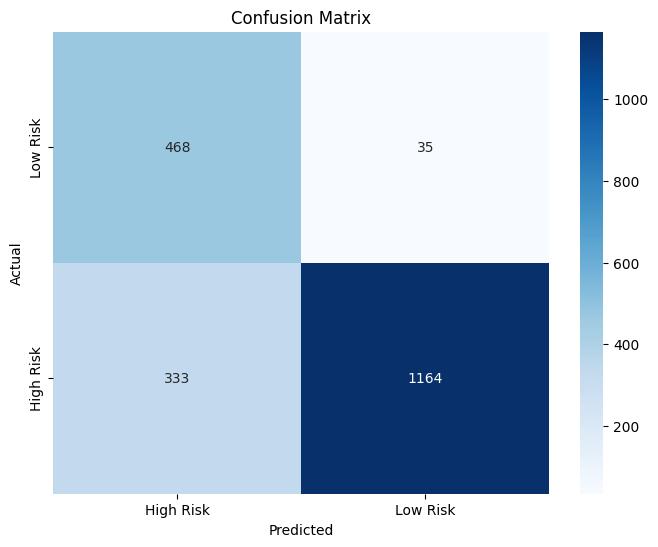

In [26]:
# prompt: confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are already defined from the previous code

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['High Risk', 'Low Risk'],
            yticklabels=['Low Risk', 'High Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()